## Reconhecimento facial

Atualmente é comum utilizarmos no dia a dia diferentes aplicações que envolvem o reconhecimento facial sem percebermos, seja nas redes sociais através de marcações automáticas ou, por exemplo, em aplicações de autenticação. Existem diferentes técnicas utilizadas para reconhecimento facial, sendo Machine Learning e, particularmente, Deep Learning, técnicas mais utilizadas. Nesse notebook, utilizaremos Deep Learning para autenticação de membros do capítulo CS/CIS. Para isso, três etapas principais serão realizadas: data augmentation, treinamento do modelo e teste.

![alt text](imgs/fb.gif "Title")


### Data Augmentation

Deep Learning é uma abordagem de aprendizagem de máquina que tem se destacado em diferentes aplicações de várias áreas como engenharia, medicina e biologia. Como aprendizagem de máquina, essa técnica extrai informações a partir de dados, com o objetivo de identificar padrões. Entretanto, em técnicas tradicionais de aprendizagem de máquina, o desempenho do algoritmo não está necessariamente relacionado a quantidade de dados, enquanto que, para Deep Learning, o desempenho aumenta consideravelmente. Esse desempenho é justificado pelo fato de modelos Deep Learning aprenderem quais características do objeto o representam, dessa forma, quanto mais imagens, maior probabilidade do modelo aprender características específicas. Assim, é comum existirem datasets com milhões de imagens de um determinado objeto, e, mais importante ainda, imagens variadas deste objeto (e.g. fotos de um rosto em diferentes ângulos).   

![alt text](imgs/dl3.png "Title")

Entretanto, para aplicações reais, criar um dataset com milhões de imagens é uma tarefa custosa, de forma que é comum criarmos instâncias artificiais (data augmentation) a partir de algumas imagens para multiplicarmos o tamanho do dataset. Para fazer isso com imagens, podemos fazer algumas transformações como rotacionar a imagem, aplicar escala e aumentar ou diminuir brilho.

In [1]:
import random
import os
import random
from scipy import ndarray
import skimage
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

import numpy as np
%matplotlib inline

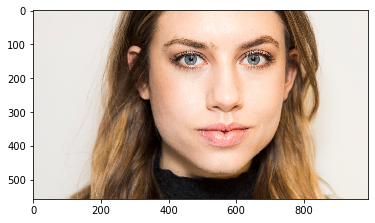

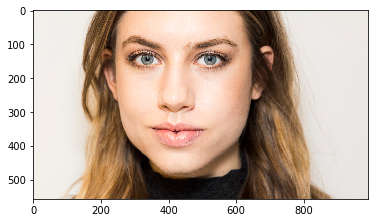

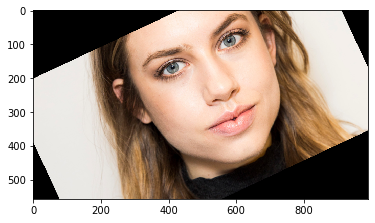

In [9]:
# leitura da imagem original
img = mpimg.imread('imgs/face.png') 
plt.imshow(img) 
plt.show()
# Flip 
flip_1 = np.fliplr(img)
plt.imshow(flip_1) 
plt.show()
# Rotacionar imagem
rot = skimage.transform.rotate(img, angle=25)
plt.imshow(rot) 
plt.show()

In [10]:
filelist= [file for file in os.listdir('imgs') if file.endswith('.png')]
for file in filelist:
    img = mpimg.imread('imgs/' + file) 
    flip_1 = np.fliplr(img)
    mpimg.imsave('../../imgs/flip_face'.jpg', flip_1)
    #for i in range(10):
    rot = skimage.transform.rotate(img, angle=i)
    mpimg.imsave('imgs/flip_face' + i + '.jpg', rot)


['conv.png',
 'face.png',
 'dl3.png',
 'feature.png',
 'mninst.png',
 'overfiting_curve.png',
 'treino_teste.png',
 'LeNet-5-structure.png',
 'dropout.png']

### Treinamento, validação e teste

Para um modelo Deep Learning aprender padrões, existe uma etapa chamada treinamento, em que através de n interações, o algoritmo analisa um set de imagens. Ao fim do set (epoch), o modelo é validado a partir de um segundo set de imagens conhecido como base de validação. Se o modelo retornar boa performance na base de validação, então o algoritmo estará aprendendo corretamente. Esse processo é repetido por uma quantidade de epochs definida pelo usuário ou até o momento em que o modelo não apresente melhorias (early stopping), finalizando o treinamento.

Quando o treinamento termina, tem-se uma terceira base, conhecida como base de teste, que irá avaliar a performance real do modelo. Essa base contém imagens que nunca foram apresentadas a rede. Em geral, a divisão entre as três bases é feita de forma que o treinamento contenha uma quantidade considerável de imagens (por exemplo 75%), enquanto validação e teste possuem uma quantidade reduzida (por exemplo, 15%).

![alt text](imgs/treino_teste.png "Title")

### Redes Neurais

Baseado nisso, para criação de um modelo Deep Learning, é necessário definir determinados parâmetros, de forma semelhante a redes neurais. Assim, em uma rede neural, tem-se uma entrada (por exemplo, uma imagem), em que suas informações (features) serão armazenadas em neurônios, camadas escondidas e uma camada de saída (classificação). Nas camadas escondidas, cada neurônio possui pesos, definidos aleatoriamente pela rede, enquanto que a camada de saída contém o rótulo do objeto desejado (por exemplo, um rosto). A medida que ocorre o treinamento, esses pesos são ajustados de forma que a rede compreenda quais dessas features são importantes para a classificação.

![alt text](imgs/neuralnetwork.jpeg "Title")

Isso ocorre através de funções matemáticas que tem como objetivo minimizar o erro, isso é feito através do cálculo do gradiente. Existem diversos otimizadores que realizam esse processo de otimização, sendo atualmente o Adam um dos mais utilizados. Ao variar o otimizador, o algoritmo poderá alcançar o menor erro de forma mais lenta ou poderá não alcança-lo, de forma a alcançar apenas um mínimo local.

![alt text](imgs/otimizadores.gif "Title")


### Deep Learning

Da mesma forma que redes neurais tradicionais, Deep Learning são redes que possuem camadas de entrada, escondida e de saída, e são treinadas a partir de otimizadores e learning rate. Entretanto, esse processo para redes neurais dependendo da aplicação tornou-se muito custoso, uma vez que é realizado pixel a pixel. Dessa forma, comummente utiliza-se técnicas de visão computacional para extrair previamente as características do objeto e a rede realizar a classificação do mesmo. 

Deep Learning entretanto, definiu camadas, ditas convolucionais, que são capazes de extrair essas características e classificá-las. Nessas camadas, os pesos não são mais individuais como em redes neurais tradicionais, ao invés disso, é definida uma máscara ou kernel com uma quantidade limitada de pesos (por exemplo, 9 pesos) que serão aplicados em toda a imagem.

![alt text](imgs/conv.png "Title")

Ao fazer isso, são extraídas a cada camada, características da imagem. Na primeira camada são extraídas features básicas (como curvas), nas camadas seguintes, são extraídas features mais signiticativas até que sejam suficientes para a classificação. 

![alt text](imgs/feature.png "Title")